# Feature Extraction

## Importing libraries

In [1]:
import numpy as np
import librosa as lb
import librosa.display
import glob
from matplotlib import pyplot
import sklearn.preprocessing
import csv

## Function Definitions
All developer created functions are defined prior to the rest of the code to ensure accessibility

In [2]:
def extract_time_series(file_path):
    time_series_array = []
    for file_name in glob.glob(file_path + r'\*.wav'):
        (time_series_data, sample_rate) = lb.load(file_name)
    ##   print(len(data)/sample_rate) -- Check tracks ingested correctly (result should be 30 seconds)
        time_series_data = np.array(time_series_data)
        time_series_array.append(time_series_data)
    return time_series_array

## Declare and Initialise Variables
Variables will be declared and initialised prior to use

In [3]:
rock_mfcc = []
metal_mfcc = []
country_mfcc = []
classical_mfcc = []
disco_mfcc = []
hiphop_mfcc = []
jazz_mfcc = []
reggae_mfcc = []
blues_mfcc = []
pop_mfcc = []

rock_zcr = []
metal_zcr = []
country_zcr = []
classical_zcr = []
disco_zcr = []
hiphop_zcr = []
jazz_zcr = []
reggae_zcr = []
blues_zcr = []
pop_zcr = []


rock_spectral_centroid = []
metal_spectral_centroid = []
country_spectral_centroid = []
classical_spectral_centroid = []
disco_spectral_centroid = []
hiphop_spectral_centroid = []
jazz_spectral_centroid = []
reggae_spectral_centroid = []
blues_spectral_centroid = []
pop_spectral_centroid = []

rock_spectral_rolloff = []
metal_spectral_rolloff = []
country_spectral_rolloff = []
classical_spectral_rolloff = []
disco_spectral_rolloff = []
hiphop_spectral_rolloff = []
jazz_spectral_rolloff = []
reggae_spectral_rolloff = []
blues_spectral_rolloff = []
pop_spectral_rolloff = []

## Reading .wav files
File paths for the corresponding directories for each genre.

In [4]:
rock_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\rock'
metal_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\metal'
country_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\country'
classical_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\classical'
disco_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\disco'
hiphop_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\hiphop'
jazz_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\jazz'
reggae_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\reggae'
blues_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\blues'
pop_file_path = r'D:\Uni\Y3\FYP\Dataset\GTZAN\pop'

Load .wav files using Librosa load and extract the time series data into an array for each track in each genre.

In [5]:
print("Rock tracks:")
rock_tracks =  np.array(extract_time_series(rock_file_path), dtype = object)
print(rock_tracks[0])

print("Metal tracks:")
metal_tracks =  np.array(extract_time_series(metal_file_path), dtype = object)
print(metal_tracks[0])

print("Country tracks:")
country_tracks =  np.array(extract_time_series(country_file_path), dtype = object)
print(country_tracks[0])

print("Classical tracks:")
classical_tracks =  np.array(extract_time_series(classical_file_path), dtype = object)
print(classical_tracks[0])

print("Disco tracks:")
disco_tracks =  np.array(extract_time_series(disco_file_path), dtype = object)
print(disco_tracks[0])

print("HipHop tracks:")
hiphop_tracks =  np.array(extract_time_series(hiphop_file_path), dtype = object)
print(hiphop_tracks[0])

print("Jazz tracks:")
jazz_tracks =  np.array(extract_time_series(jazz_file_path), dtype = object)
print(jazz_tracks[0])

print("Reggae tracks:")
reggae_tracks =  np.array(extract_time_series(reggae_file_path), dtype = object)
print(reggae_tracks[0])

# Remember to discuss that MFCC didnt work with dtype = object for blues or pop

print("Blues tracks:")
blues_tracks =  np.array(extract_time_series(blues_file_path), dtype = float)
print(blues_tracks[0])

print("Pop tracks:")
pop_tracks =  np.array(extract_time_series(pop_file_path), dtype = float)
print(pop_tracks[0])

Rock tracks:
[-0.03344727 -0.05490112 -0.05435181 ... -0.08416748  0.02886963
  0.1296997 ]
Metal tracks:
[-0.12237549 -0.04919434  0.04440308 ... -0.17837524 -0.08401489
 -0.0284729 ]
Country tracks:
[-0.13415527 -0.19485474 -0.04257202 ...  0.2260437   0.15042114
  0.04238892]
Classical tracks:
[-0.02008057 -0.01748657  0.00418091 ...  0.01934814  0.027771
  0.03131104]
Disco tracks:
[-0.23202515 -0.23168945 -0.1979065  ... -0.17419434 -0.14257812
 -0.10617065]
HipHop tracks:
[-0.16915894 -0.021698    0.01956177 ...  0.07662964  0.03872681
 -0.02105713]
Jazz tracks:
[-0.00924683 -0.01177979 -0.01370239 ...  0.0071106   0.00561523
  0.00561523]
Reggae tracks:
[ 0.01037598  0.00775146  0.03887939 ... -0.06652832 -0.05062866
 -0.03564453]
Blues tracks:
[ 0.00732422  0.01660156  0.00762939 ... -0.05560303 -0.06106567
 -0.06417847]
Pop tracks:
[-0.0887146  -0.09524536 -0.10275269 ...  0.04016113  0.03860474
  0.02639771]


## Feature extraction
Using Librosa feature extraction, extract the MFCC, Spectral Centroid, Spectral Rolloff and Zero Crossing Rate for each track in each genre.

### Extracting MFCC
Extracting the Mel-frequency Cepstral Coefficients.
The mean of 15 MFCC values calculated per track will be used as the MFCC for that track.

In [6]:
for i in range(0, 100, 1):
    rock_mfcc.append(np.mean(lb.feature.mfcc(rock_tracks[i].flatten(), n_mfcc = 15)))
    metal_mfcc.append(np.mean(lb.feature.mfcc(metal_tracks[i].flatten(), n_mfcc = 15)))
    country_mfcc.append(np.mean(lb.feature.mfcc(country_tracks[i].flatten(), n_mfcc = 15)))
    classical_mfcc.append(np.mean(lb.feature.mfcc(classical_tracks[i].flatten(), n_mfcc = 15)))
    disco_mfcc.append(np.mean(lb.feature.mfcc(disco_tracks[i].flatten(), n_mfcc = 15)))
    hiphop_mfcc.append(np.mean(lb.feature.mfcc(hiphop_tracks[i].flatten(), n_mfcc = 15)))
    jazz_mfcc.append(np.mean(lb.feature.mfcc(jazz_tracks[i].flatten(), n_mfcc = 15)))
    reggae_mfcc.append(np.mean(lb.feature.mfcc(reggae_tracks[i].flatten(), n_mfcc = 15)))
    blues_mfcc.append(np.mean(lb.feature.mfcc(blues_tracks[i].flatten(), n_mfcc = 15)))
    pop_mfcc.append(np.mean(lb.feature.mfcc(pop_tracks[i].flatten(), n_mfcc = 15)))

rock_mfcc = np.array(rock_mfcc)
metal_mfcc = np.array(metal_mfcc)
country_mfcc = np.array(country_mfcc)
classical_mfcc = np.array(classical_mfcc)
disco_mfcc = np.array(disco_mfcc)
hiphop_mfcc = np.array(hiphop_mfcc)
jazz_mfcc = np.array(jazz_mfcc)
reggae_mfcc = np.array(reggae_mfcc)
blues_mfcc = np.array(blues_mfcc)
pop_mfcc = np.array(pop_mfcc)

print("Rock MFCC:")
print(rock_mfcc)
print("Blues MFCC:")
print(blues_mfcc)

Rock MFCC:
[  0.15879627   4.1834054    2.8690293    4.7409253    6.076051
   3.818377     0.12723938   2.9310734    7.6156106    1.282198
   2.7413862    1.940638    -2.3493044    3.178289    -6.4717636
  -5.421212     5.624566     3.7811782    4.4610057   -1.1303376
   1.547522     1.0081351    0.16354166  -0.81965876  -0.17370315
   1.9661676    4.0621195   -0.18630117   3.8582406    6.2119412
   0.39667603  -2.3142226    7.312733     0.2919581    7.242213
   6.501367     8.247836     1.7985431    5.99482      3.7337265
   3.2010226    5.1306033    2.5633225    2.576268     2.7038846
  -4.5242434    0.44042298   2.272755     0.27338907   1.0270497
   4.7724175    5.0635996   -4.774525     7.0451703   -7.53578
   2.2616208    7.384728     3.467913    -1.4229873   -3.1948283
   2.1342852   -2.0885043   -5.1572556   -5.384867    -2.0934834
   2.2510405  -10.624068     0.03572613   0.58029526  -7.571326
  -7.5532827    6.397498     5.808796     6.153874     5.5638986
   3.125104     3.7

### Extracting ZCR
Extracting the Zero Crossing Rate using Librosa's Zero Crossings function.
The librosa.features.zero_crossing_rate behaves slightly differently to the behaviour wanted by the developer and will not be used for this reason.
Below is a proof of concept to show that the function can be used for a simple count of crossings in the track.

10


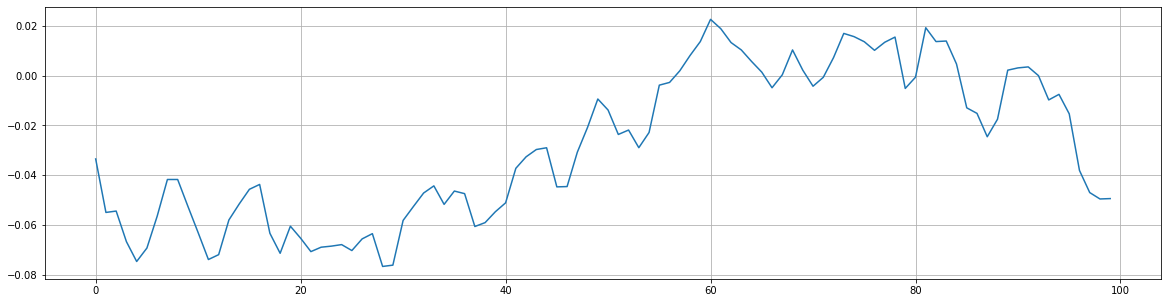

In [7]:
pyplot.figure(figsize = (20, 5))
pyplot.plot(rock_tracks[0][0:100])
pyplot.grid()
print(sum(lb.zero_crossings(rock_tracks[0][0:100], pad = False)))

Calculating the number of zero crossings throughout each 30 second track.

In [8]:
for i in range(0, 100, 1):
    rock_zcr.append(sum(lb.zero_crossings(rock_tracks[i], pad = False)))
    metal_zcr.append(sum(lb.zero_crossings(metal_tracks[i], pad = False)))
    country_zcr.append(sum(lb.zero_crossings(country_tracks[i], pad = False)))
    classical_zcr.append(sum(lb.zero_crossings(classical_tracks[i], pad = False)))
    disco_zcr.append(sum(lb.zero_crossings(disco_tracks[i], pad = False)))
    hiphop_zcr.append(sum(lb.zero_crossings(hiphop_tracks[i], pad = False)))
    jazz_zcr.append(sum(lb.zero_crossings(jazz_tracks[i], pad = False)))
    reggae_zcr.append(sum(lb.zero_crossings(reggae_tracks[i], pad = False)))
    blues_zcr.append(sum(lb.zero_crossings(blues_tracks[i], pad = False)))
    pop_zcr.append(sum(lb.zero_crossings(pop_tracks[i], pad = False)))

print("Rock ZCR:")
print(sum(lb.zero_crossings(rock_tracks[0], pad = False)))
print(rock_zcr[0])

print("Blues ZCR:")
print(sum(lb.zero_crossings(blues_tracks[0], pad = False)))
print(blues_zcr[0])

Rock ZCR:
59809
59809
Blues ZCR:
55031
55031


### Extracting Spectral Centroid
Extracting the Spectral Centroid.
As lb.feature.spectral_centroid() returns an array of values for each frame, the mean will be calculated for a value for the track.

Rock Spectral Centroid:
[1996.32766439 1529.47496063 1875.31563102 1421.44597972 1345.69306133
 1542.13182114 1676.11875692 1282.16590897 1717.13197669 1181.23133754
 1857.94886838 1537.5906799  1863.67679976 1597.53126105 1937.04663915
 2335.5626669  2459.49942273 2312.16028507 2209.04307564 2321.18947932
 2188.14305997 2158.20604209 2342.44083599 2294.78590667 2320.30264308
 2510.23098991 2263.155432   2669.22560162 2046.71241714 2445.02801275
 2944.36059987 2639.20241849 2344.55763971 1673.87757361 2788.25057634
 1867.0823939  2850.22684625 2626.72025928 2794.95719373 2559.13637391
 3009.95870729 2806.85135454 2794.81552856 2739.39144294 1651.42108595
 1560.99979166 2429.03104062 2997.72431806 1646.21207429 2077.94260689
 1721.08846007 3031.03354708 2186.62228226 3361.72325156 2632.22042827
 1712.39131592 3303.1623095  3488.55494269 2438.0070494  2424.13664757
 2796.51217053 2071.3773181  2947.09450675 1711.04021975 2181.21508105
 2294.17992867 2209.48310426 2414.15246663 2467.28465

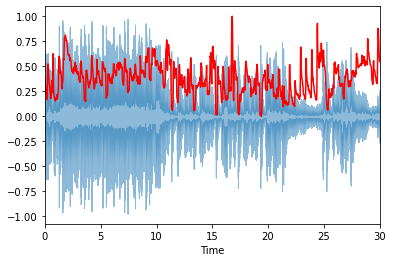

In [9]:
spec_cen = lb.feature.spectral_centroid(rock_tracks[0])[0]
frames = range(len(spec_cen))
time = lb.frames_to_time(frames)

def norm(data, axis = 0):
    return sklearn.preprocessing.minmax_scale(data, axis = axis)

lb.display.waveplot(rock_tracks[0], alpha = 0.5)
pyplot.plot(time, norm(spec_cen), color = 'r')

for i in range(0, 100, 1):
    rock_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(rock_tracks[i])))
    metal_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(metal_tracks[i])))
    country_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(country_tracks[i])))
    classical_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(classical_tracks[i])))
    disco_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(disco_tracks[i])))
    hiphop_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(hiphop_tracks[i])))
    jazz_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(jazz_tracks[i])))
    reggae_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(reggae_tracks[i])))
    blues_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(blues_tracks[i])))
    pop_spectral_centroid.append(np.mean(lb.feature.spectral_centroid(pop_tracks[i])))

rock_spectral_centroid = np.array(rock_spectral_centroid)
metal_spectral_centroid = np.array(metal_spectral_centroid)
country_spectral_centroid = np.array(country_spectral_centroid)
classical_spectral_centroid = np.array(classical_spectral_centroid)
disco_spectral_centroid = np.array(disco_spectral_centroid)
hiphop_spectral_centroid = np.array(hiphop_spectral_centroid)
jazz_spectral_centroid = np.array(jazz_spectral_centroid)
reggae_spectral_centroid = np.array(reggae_spectral_centroid)
blues_spectral_centroid = np.array(blues_spectral_centroid)
pop_spectral_centroid = np.array(pop_spectral_centroid)

print("Rock Spectral Centroid:")
print(rock_spectral_centroid)
print(rock_spectral_centroid.shape)

print("Blues Spectral Centroid:")
print(blues_spectral_centroid)
print(blues_spectral_centroid.shape)

### Extracting Spectral Rolloff
Extracting the Spectral Rolloff.
As lb.feature.spectral_rolloff() returns an array of spectral rolloff % per a frame, the mean will be calculated to give an overall value per a track.

In [10]:
for i in range(0, 100, 1):
    rock_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(rock_tracks[i])))
    metal_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(metal_tracks[i])))
    country_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(country_tracks[i])))
    classical_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(classical_tracks[i])))
    disco_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(disco_tracks[i])))
    hiphop_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(hiphop_tracks[i])))
    jazz_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(jazz_tracks[i])))
    reggae_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(reggae_tracks[i])))
    blues_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(blues_tracks[i])))
    pop_spectral_rolloff.append(np.mean(lb.feature.spectral_rolloff(pop_tracks[i])))

rock_spectral_rolloff = np.array(rock_spectral_rolloff)
metal_spectral_rolloff = np.array(metal_spectral_rolloff)
country_spectral_rolloff = np.array(country_spectral_rolloff)
classical_spectral_rolloff = np.array(classical_spectral_rolloff)
disco_spectral_rolloff = np.array(disco_spectral_rolloff)
hiphop_spectral_rolloff = np.array(hiphop_spectral_rolloff)
jazz_spectral_rolloff = np.array(jazz_spectral_rolloff)
reggae_spectral_rolloff = np.array(reggae_spectral_rolloff)
blues_spectral_rolloff = np.array(blues_spectral_rolloff)
pop_spectral_rolloff = np.array(pop_spectral_rolloff)

print("Rock Spectral Rolloff:")
print(rock_spectral_rolloff)
print(rock_spectral_rolloff.shape)

print("Blues Spectral Rolloff:")
print(blues_spectral_rolloff)
print(blues_spectral_rolloff.shape)

Rock Spectral Rolloff:
[4227.93535202 3271.92275187 3929.52645782 3042.49338385 2938.99078723
 2869.7364754  3255.08588539 2675.78776419 3362.18567603 2367.1951471
 4191.63866508 3416.75144558 3986.11564902 3825.59086563 3986.14895637
 4500.09805277 5024.26417942 4528.65078034 4593.58346324 4701.48263033
 4432.58405008 4245.91299531 4595.39871393 4847.9433843  4466.38268561
 4735.36453424 4602.9261755  5445.8587363  4095.24718813 5173.47278993
 6333.37634589 5302.98010169 4728.69962503 3431.42333418 5831.99149316
 4270.51880166 5897.60607489 5047.11302295 5862.41455078 5446.93447741
 6131.20071871 5677.17987556 5878.32297482 5326.58668748 3455.02991997
 3242.9120482  5035.53039126 5962.03267746 3183.84145927 4495.80973118
 3811.16045534 6732.67320956 4462.71055005 6920.30185071 5309.8580699
 3618.66061394 6717.20194451 7660.02483324 5499.14375181 5643.69765988
 6203.04467717 4685.84482852 6984.03546893 3491.67633411 4689.61688615
 4730.13527996 4575.11453651 5213.02527054 5402.86052376

## Store Data
Write extracted data to a CSV file.

In [11]:
with open("extracted-features.csv", mode = 'w', newline = '') as feature_file:
    feature_writer = csv.writer(feature_file, delimiter = ',')
    feature_writer.writerow(["Genre", "TrackNum", "MFCC", "ZCR", "Spectral Centroid", "Spectral Rolloff"])

    for i in range(0, 1000, 1):
        if i < 100:
            track_num = i
            feature_writer.writerow(["Rock", track_num, rock_mfcc[track_num], rock_zcr[track_num],
                                    rock_spectral_centroid[track_num], rock_spectral_rolloff[track_num]])
        elif i < 200:
            track_num = i - 100
            feature_writer.writerow(["Metal", track_num, metal_mfcc[track_num], metal_zcr[track_num],
                                    metal_spectral_centroid[track_num], metal_spectral_rolloff[track_num]])
        elif i < 300:
            track_num = i - 200
            feature_writer.writerow(["Country", track_num, country_mfcc[track_num], country_zcr[track_num],
                                    country_spectral_centroid[track_num], country_spectral_rolloff[track_num]])
        elif i < 400:
            track_num = i - 300
            feature_writer.writerow(["Classical", track_num, classical_mfcc[track_num], classical_zcr[track_num],
                                    classical_spectral_centroid[track_num], classical_spectral_rolloff[track_num]])
        elif i < 500:
            track_num = i - 400
            feature_writer.writerow(["Disco", track_num, disco_mfcc[track_num], disco_zcr[track_num],
                                    disco_spectral_centroid[track_num], disco_spectral_rolloff[track_num]])
        elif i < 600:
            track_num = i - 500
            feature_writer.writerow(["HipHop", track_num, hiphop_mfcc[track_num], hiphop_zcr[track_num],
                                    hiphop_spectral_centroid[track_num], hiphop_spectral_rolloff[track_num]])
        elif i < 700:
            track_num = i - 600
            feature_writer.writerow(["Jazz", track_num, jazz_mfcc[track_num], jazz_zcr[track_num],
                                    jazz_spectral_centroid[track_num], jazz_spectral_rolloff[track_num]])
        elif i < 800:
            track_num = i - 700
            feature_writer.writerow(["Reggae", track_num, reggae_mfcc[track_num], reggae_zcr[track_num],
                                     reggae_spectral_centroid[track_num], reggae_spectral_rolloff[track_num]])
        elif i < 900:
            track_num = i - 800
            feature_writer.writerow(["Blues", track_num, blues_mfcc[track_num], blues_zcr[track_num],
                                    blues_spectral_centroid[track_num], blues_spectral_rolloff[track_num]])
        elif i < 1000:
            track_num = i - 900
            feature_writer.writerow(["Pop", track_num, pop_mfcc[track_num], pop_zcr[track_num],
                                    pop_spectral_centroid[track_num], pop_spectral_rolloff[track_num]])